# Sourcing and Analysing Time-Series Data

### Contents:

#### 01. Import Libraries and Data
#### 02. Subsetting, wrangling, and cleaning time-series data
#### 03. Time series analysis: decomposition
#### 04. Testing for stationarity
#### 05. Stationarizing the Federal Reserve Economic Data

## 01. Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
import requests

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or feature.

plt.style.use('fivethirtyeight')

In [2]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

>**NOTE**: For the purpose of this CareerFoundry exercise, I opted not to use Quandl as I could not find viable datasets with accessible data relevant to my project. Instead, I utilized data from HealthData.gov, which does not require an API key for access. Nonetheless, I understand the importance and functionality of APIs, including how they are used and how to integrate them into a project. APIs facilitate automated data retrieval, ensuring that datasets are up-to-date and easily accessible for analysis.

In [3]:
# Define path for importing the data

path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Advanced Analytics and Dashboard Design\Acheivement 6'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv'))

In [5]:
# Check data

df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,inpatient_beds_utilization,inpatient_beds_utilization_coverage,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_coverage,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_coverage,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_18-19_coverage,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_20-29_coverage,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_30-39_coverage,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_40-49_coverage,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_50-59_coverage,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_60-69_coverage,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_70-79_coverage,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_80+_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_18-19_coverage,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_20-29_coverage,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_30-39_coverage,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_40-49_coverage,previ

## 02. Subsetting, Wrangling, and Cleaning Time-Series Data

In [6]:
# Create subset of relevant columns (date and inpatient_beds_used_covid)

df_time_series = df[['date', 'inpatient_beds_used_covid']]

> I choose these data points because I wanted to see if COVID-19 had impact on readmission rates given that the data I sourced was from 2019 to 2024

In [7]:
# Handle missing values (if any)

df_time_series.isnull().sum()

date                           0
inpatient_beds_used_covid    846
dtype: int64

In [8]:
df_time_series_cleaned = df_time_series.dropna()

In [9]:
# Convert 'date' to datetime format

df_time_series_cleaned['date'] = pd.to_datetime(df_time_series_cleaned['date'])

In [10]:
# Check output
df_time_series_cleaned.head(1)

,date,inpatient_beds_used_covid
0,2021-06-15,125.0


In [11]:
# Aggregate data by date to handle duplicates (e.g., by summing up the values)

df_time_series_cleaned= df_time_series_cleaned.groupby('date').sum()

In [12]:
# Sort data by date

df_time_series_cleaned.sort_index(inplace=True)

In [13]:
# Print the time series DataFrame

df_time_series_cleaned.head()

,inpatient_beds_used_covid
date,
2020-01-01,0.0
2020-01-02,1877.0
2020-01-03,1877.0
2020-01-04,1877.0
2020-01-05,1877.0


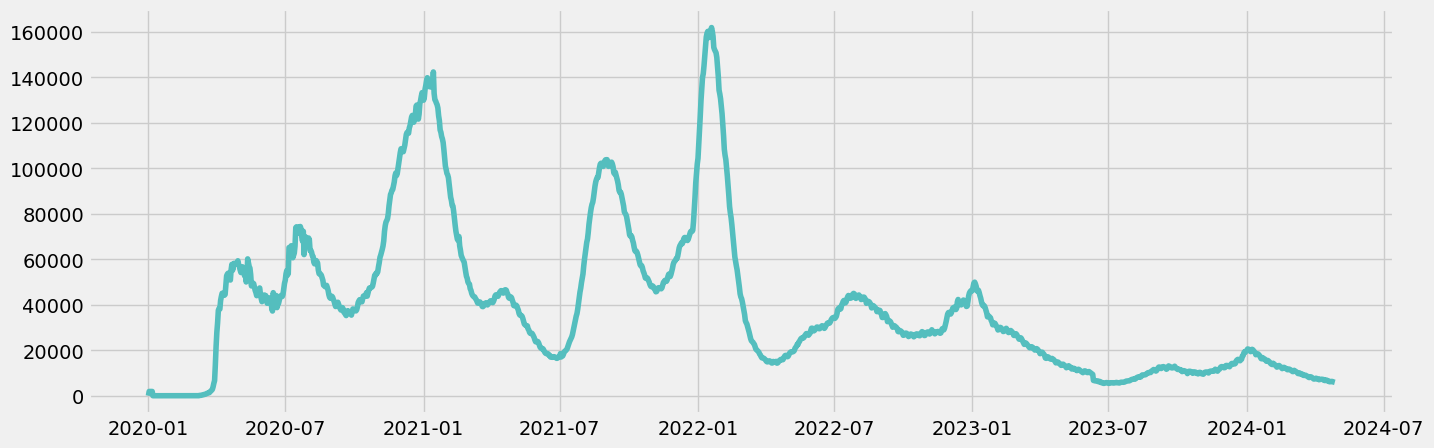

In [14]:
# Plot the time series data

fig, bed_time_series = plt.subplots(figsize=(15, 5), dpi=100)
bed_time_series.plot(df_time_series_cleaned, color='#54bebe')

## 03. Time-series Analysis: Decomposition

In [16]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_time_series_cleaned, model='additive')

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

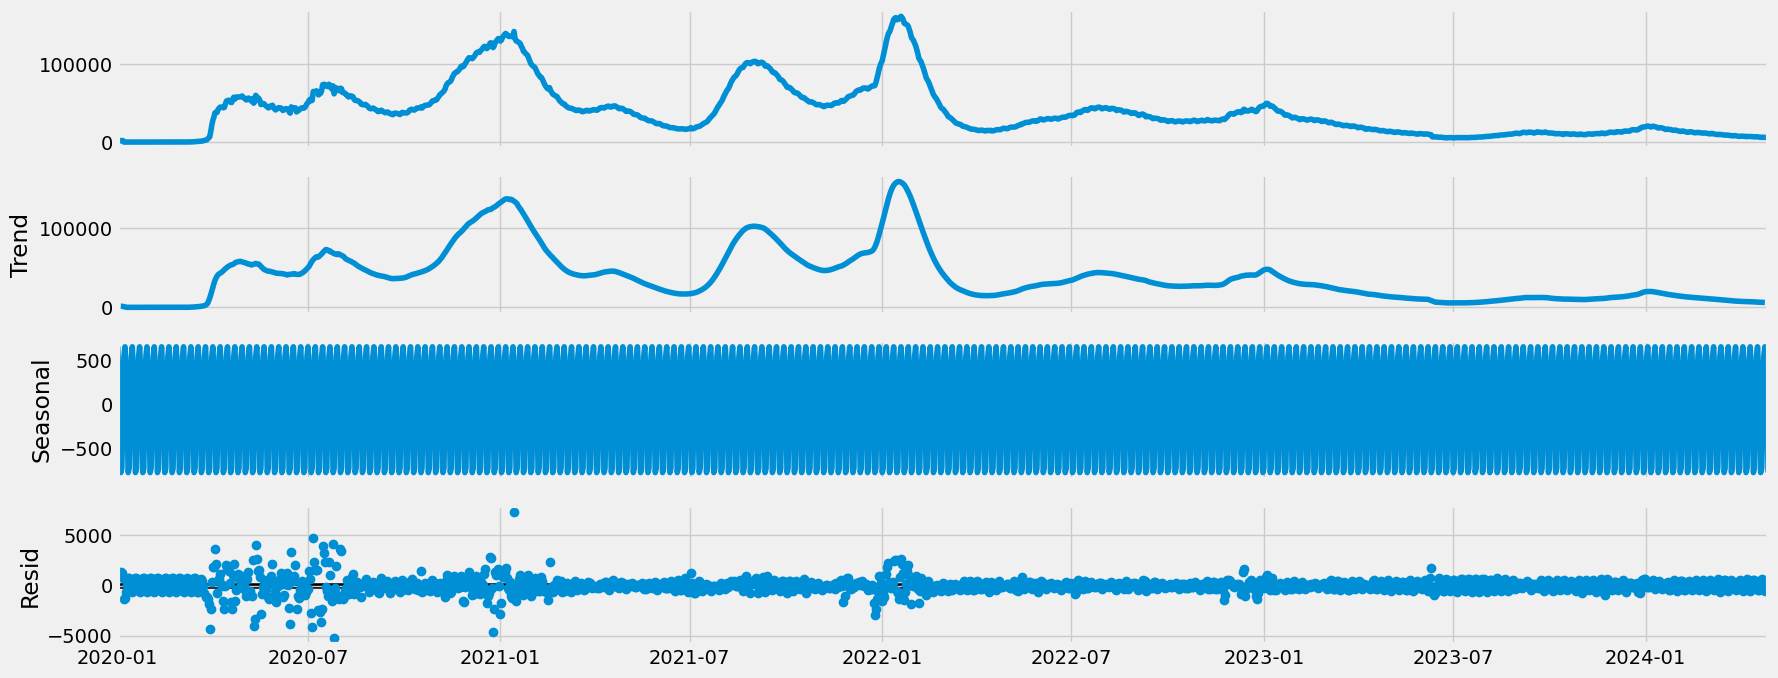

In [19]:
# Plot the separate components

decomposition.plot()
plt.show()

>**Results**
>
>The time-series decomposition analysis of inpatient bed usage for COVID-19 reveals distinct components of the data. The observed data shows significant peaks and troughs, corresponding to the varying levels of bed usage over time, reflecting the waves of the pandemic. These fluctuations are captured by the trend component, which smooths out short-term variations to highlight the overall direction of bed usage. The trend indicates periods of increasing and decreasing bed usage, aligning with the multiple waves of COVID-19.
>
>The seasonal component exposes regular, periodic fluctuations that repeat consistently, likely due to weekly cycles in data reporting or healthcare activities. This consistent pattern suggests a strong seasonal effect throughout the dataset. Meanwhile, the residual component, which captures the noise and irregularities after removing the trend and seasonal effects, shows minimal unexplained variance with some outliers. This indicates that most of the variation in the data is accounted for by the trend and seasonal components.
>
>Overall, the decomposition effectively separates the data into understandable parts, illustrating the impact of COVID-19 waves on hospital bed usage and highlighting the regular periodic cycles. The residuals indicate that the model explains the majority of the data's variation, leaving behind only minor irregularities. This comprehensive breakdown provides valuable insights into the dynamics of healthcare demand during the pandemic.

## 04. Testing for Stationarity

In [25]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time_series_cleaned['inpatient_beds_used_covid'])

Dickey-Fuller Stationarity test:
Test Statistic                   -3.471837
p-value                           0.008741
Number of Lags Used              24.000000
Number of Observations Used    1554.000000
Critical Value (1%)              -3.434565
Critical Value (5%)              -2.863402
Critical Value (10%)             -2.567761
dtype: float64


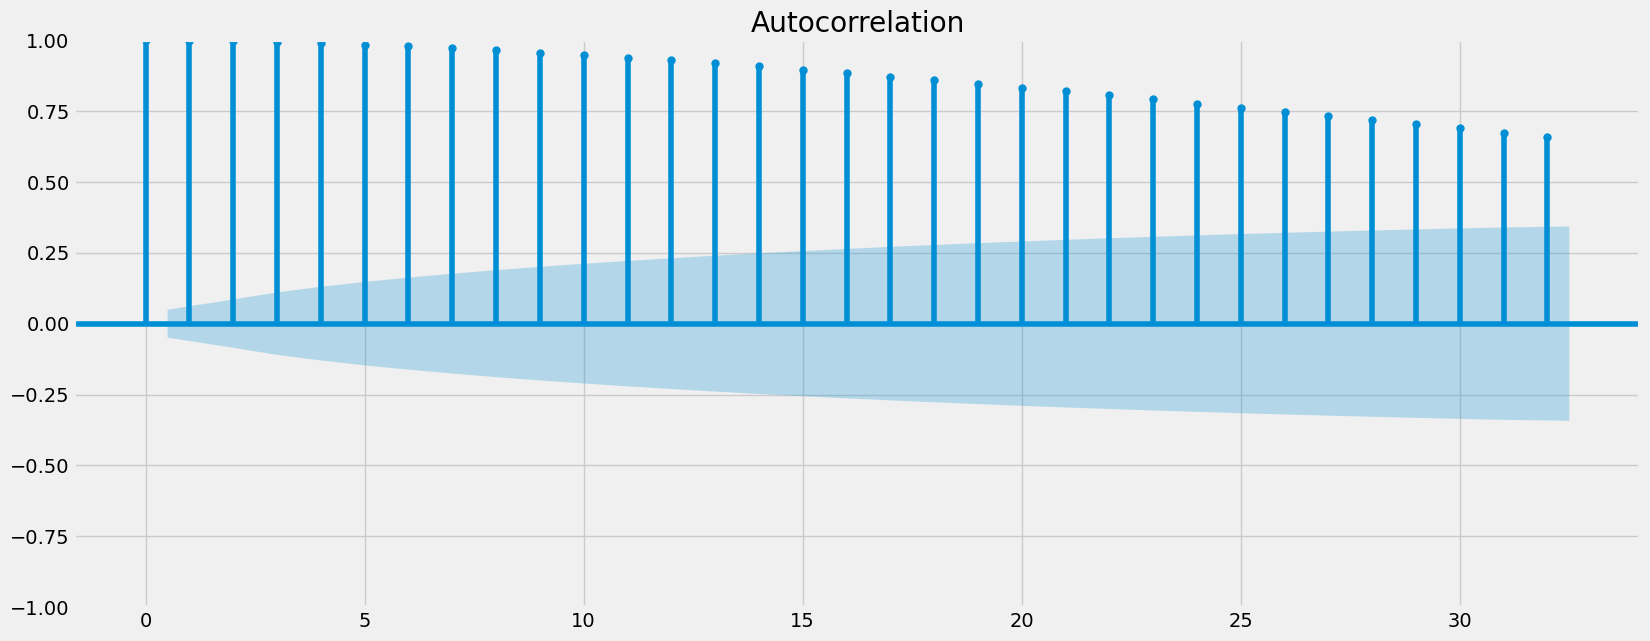

In [26]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_time_series_cleaned)
plt.show()

>**Interpretation**
>
>- The high autocorrelation at multiple lags indicates the presence of a trend and possibly seasonal components in the data.
>
> - The gradual decrease and persistence of significant autocorrelations suggest that the series has a long memory, meaning past values significantly influence future values.
>
>Despite the autocorrelation plot showing strong correlations over several lags, the Dickey-Fuller test indicates that the inpatient beds used for COVID-19 time series is stationary. This means that, statistically, the series does not have a unit root and its properties do not change over time, even though the visual inspection of autocorrelations might suggest non-stationarity due to the presence of trends and seasonal patterns. The test provides a robust statistical basis to conclude that the series is stationary.